# Instrucciones
Aplicar de forma integral el proceso de entrenamiento, ajuste y evaluación de un clasificador tipo Árbol de Decisión sobre un conjunto de datos grande, aplicando técnicas robustas de validación cruzada y optimización de hiperparámetros.

📅 Entrega: 10/05/2025, 23:55 hrs.
📂 Formato: notebook en Google Colab con sus respectivas salidas: link a github, colab o cuaderno (cualquiera de esas opciones)

📦 Dataset sugerido
Usa el conjunto de datos Glioma Grading Clinical and Mutation Features. Este conjunto de datos lo puedes encontrar en https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset






# 1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos

Declarar las bibliotecas necesarias para este proyecto
Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [18]:
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
import math
import matplotlib.gridspec as gridspec
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
df=pd.read_csv('/content/drive/MyDrive/Unidad04/TCGA_InfoWithGrade.csv')
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. 📊 Análisis exploratorio de datos (EDA)

Realiza un análisis inicial de los datos antes de modelar:

Describir forma y estructura (shape, describe(), info()).

Mostrar la distribución de clases (y.value_counts()).

Visualizar:

Histograma de al menos 3 variables numéricas.

Boxplots o violin plots por clase si es computacionalmente viable.

Mapa de calor de correlaciones entre variables.



..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Filas y Columnas ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


La base de datos consta de 839 filas y 24 columnas

...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Nombre de las columnas y su tipo de dato ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 


   Nombre de la columna     Tipo
0                 Grade    int64
1                Gender    int64
2      Age_at_diagnosis  float64
3                  Race    int64
4                  IDH1    int64
5                  TP53    int64
6                  ATRX    int64
7                  PTEN    int64
8                  EGFR    int64
9                   CIC    int64
10                MUC16    int64
11               PIK3CA    int64
12                  NF1    int64
13               PIK3R1    int64
14                FUBP1    int64
15                  RB1    int64
16               NOTCH1    int64
17          

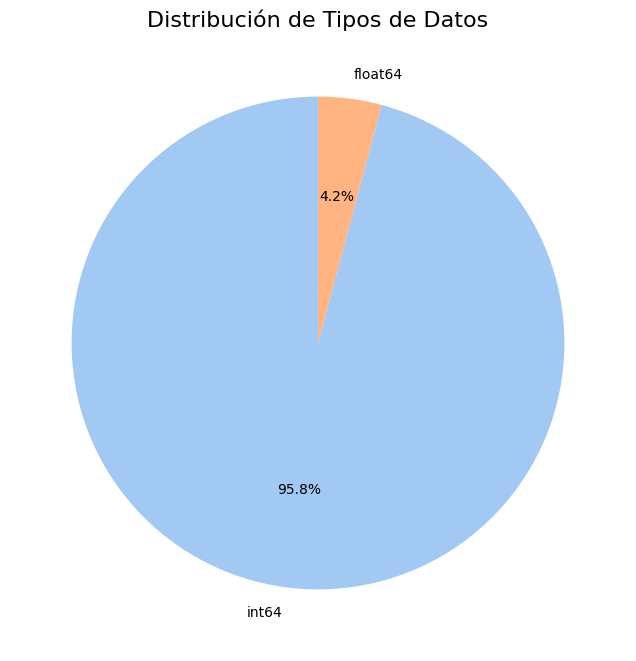

...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Descripción Estadística del dataframe ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 


            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     

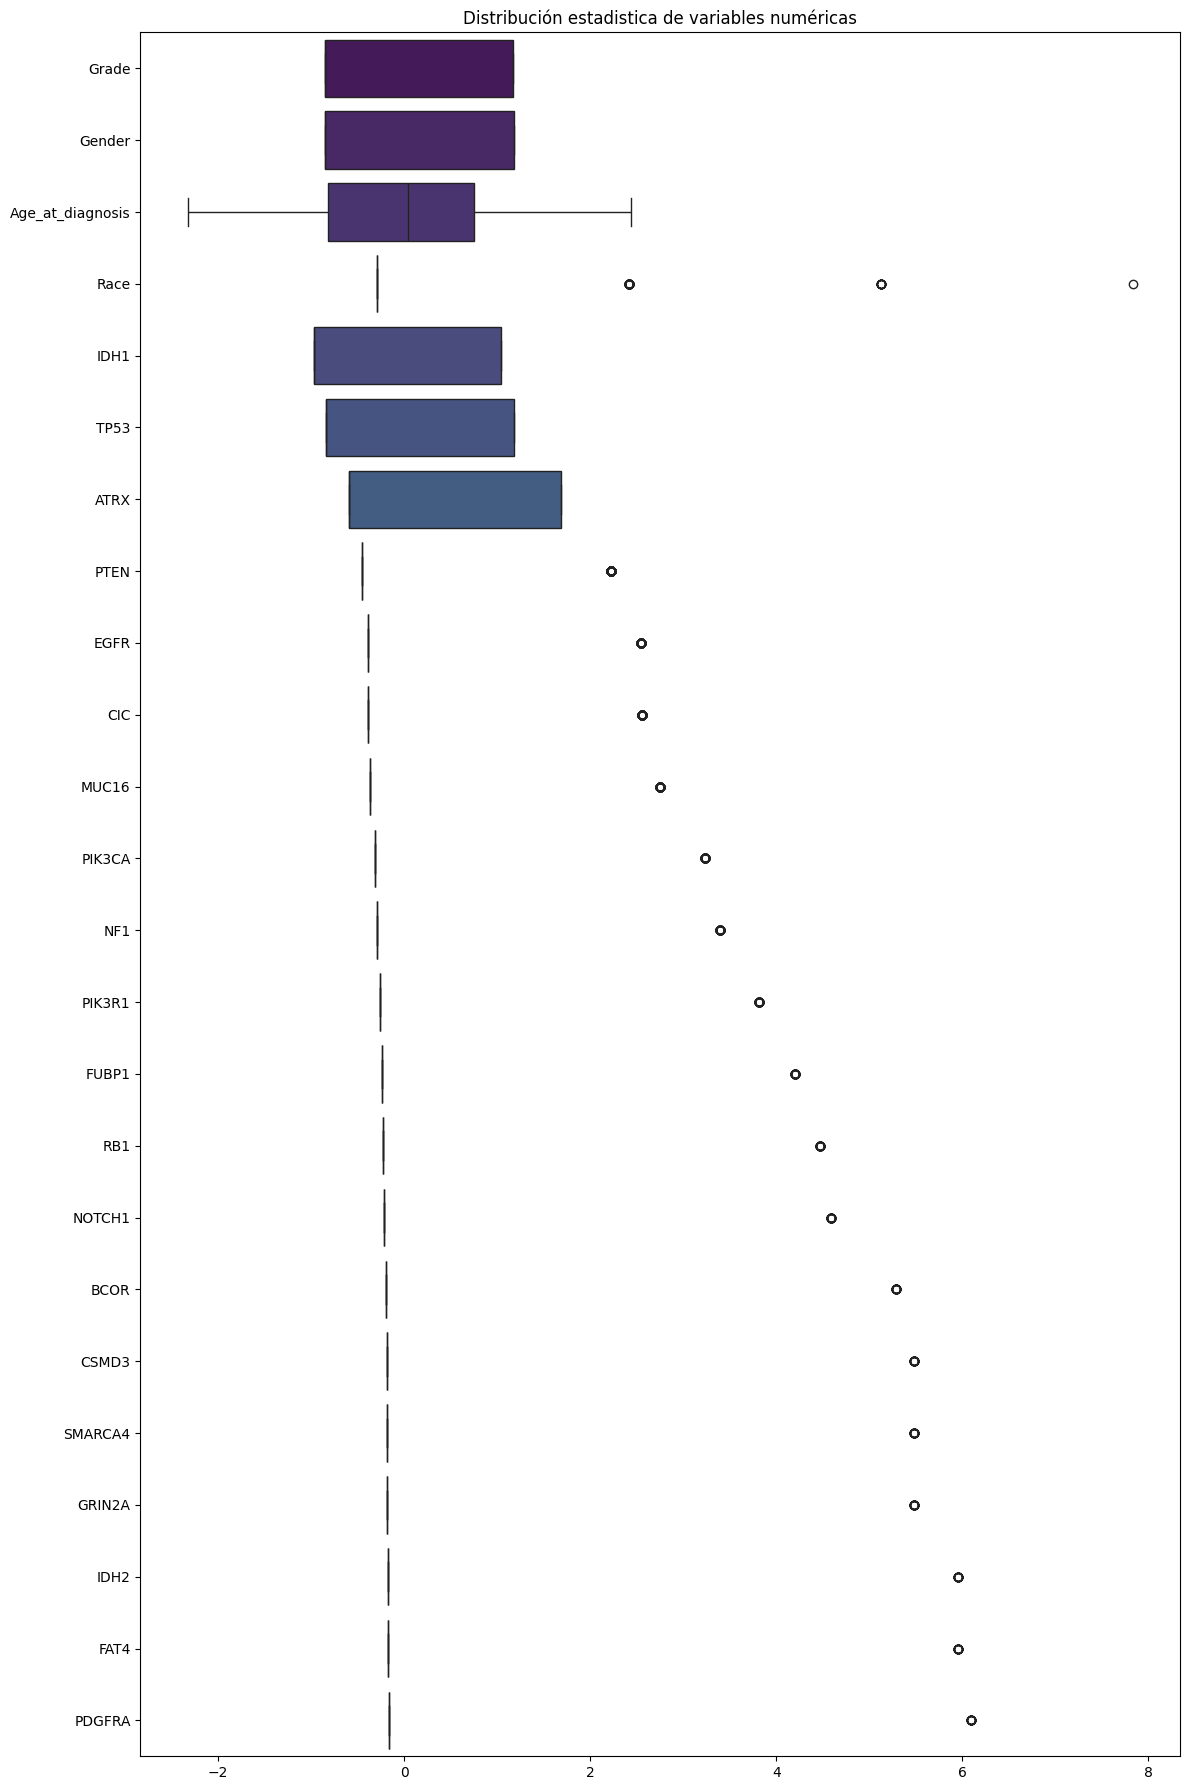

................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Corrección de tipos de datos ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 



Todas las columnas son int o float ✓


............············~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Limpieza, Transformación y Normalización de Datos Categóricos ≋≋≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~············............ 



No hay columnas con Datos Categóricos


..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Datos Perdidos ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 




No hay Datos Perdidos


............············~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Limpieza, Transformación y Normalización de Datos Temporales: ≋≋≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~············............ 



No hay columnas con datos temporales


...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Outliers ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




<ipython-input-19-cd8dffc621cf>:42: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[i]):


,Columna,Límite Inferior,Límite Superior,Número Outliers,Porcentaje (%)
0,Grade,-1.50,2.50,0,0.00
1,Gender,-1.50,2.50,0,0.00
2,Age_at_diagnosis,0.94,99.92,0,0.00
3,Race,0.00,0.00,74,8.82
4,IDH1,-1.50,2.50,0,0.00
5,TP53,-1.50,2.50,0,0.00
6,ATRX,-1.50,2.50,0,0.00
7,PTEN,0.00,0.00,141,16.81
8,EGFR,0.00,0.00,112,13.35
9,CIC,0.00,0.00,111,13.23


................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Histogramas de las columnas ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 




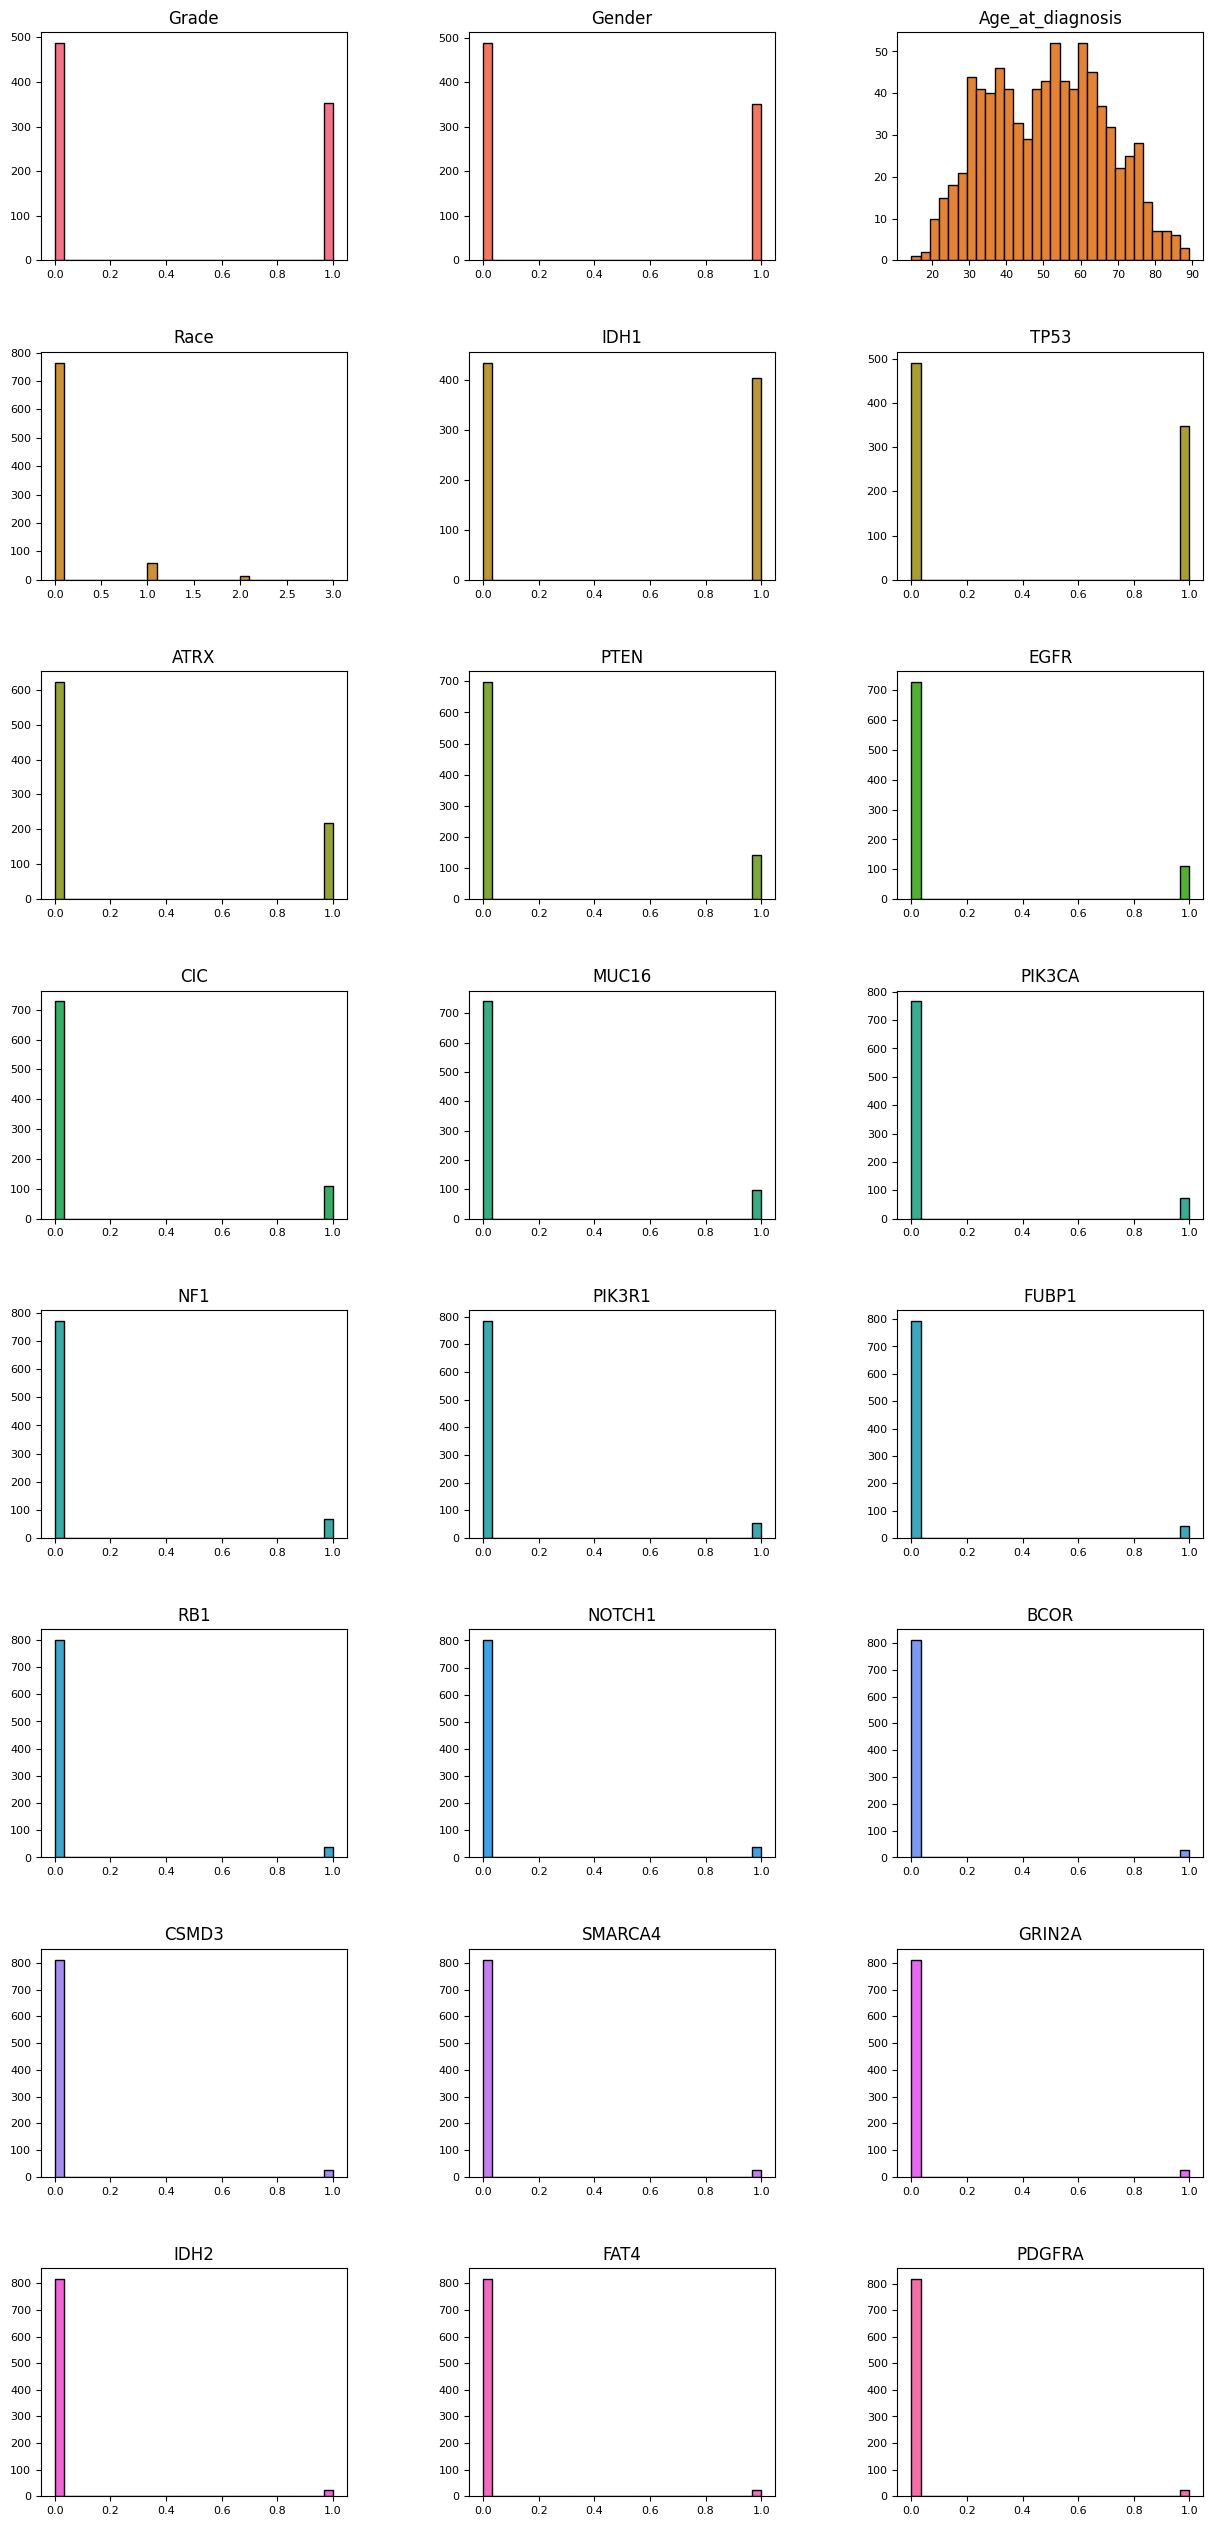

..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Mapa de calor ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 




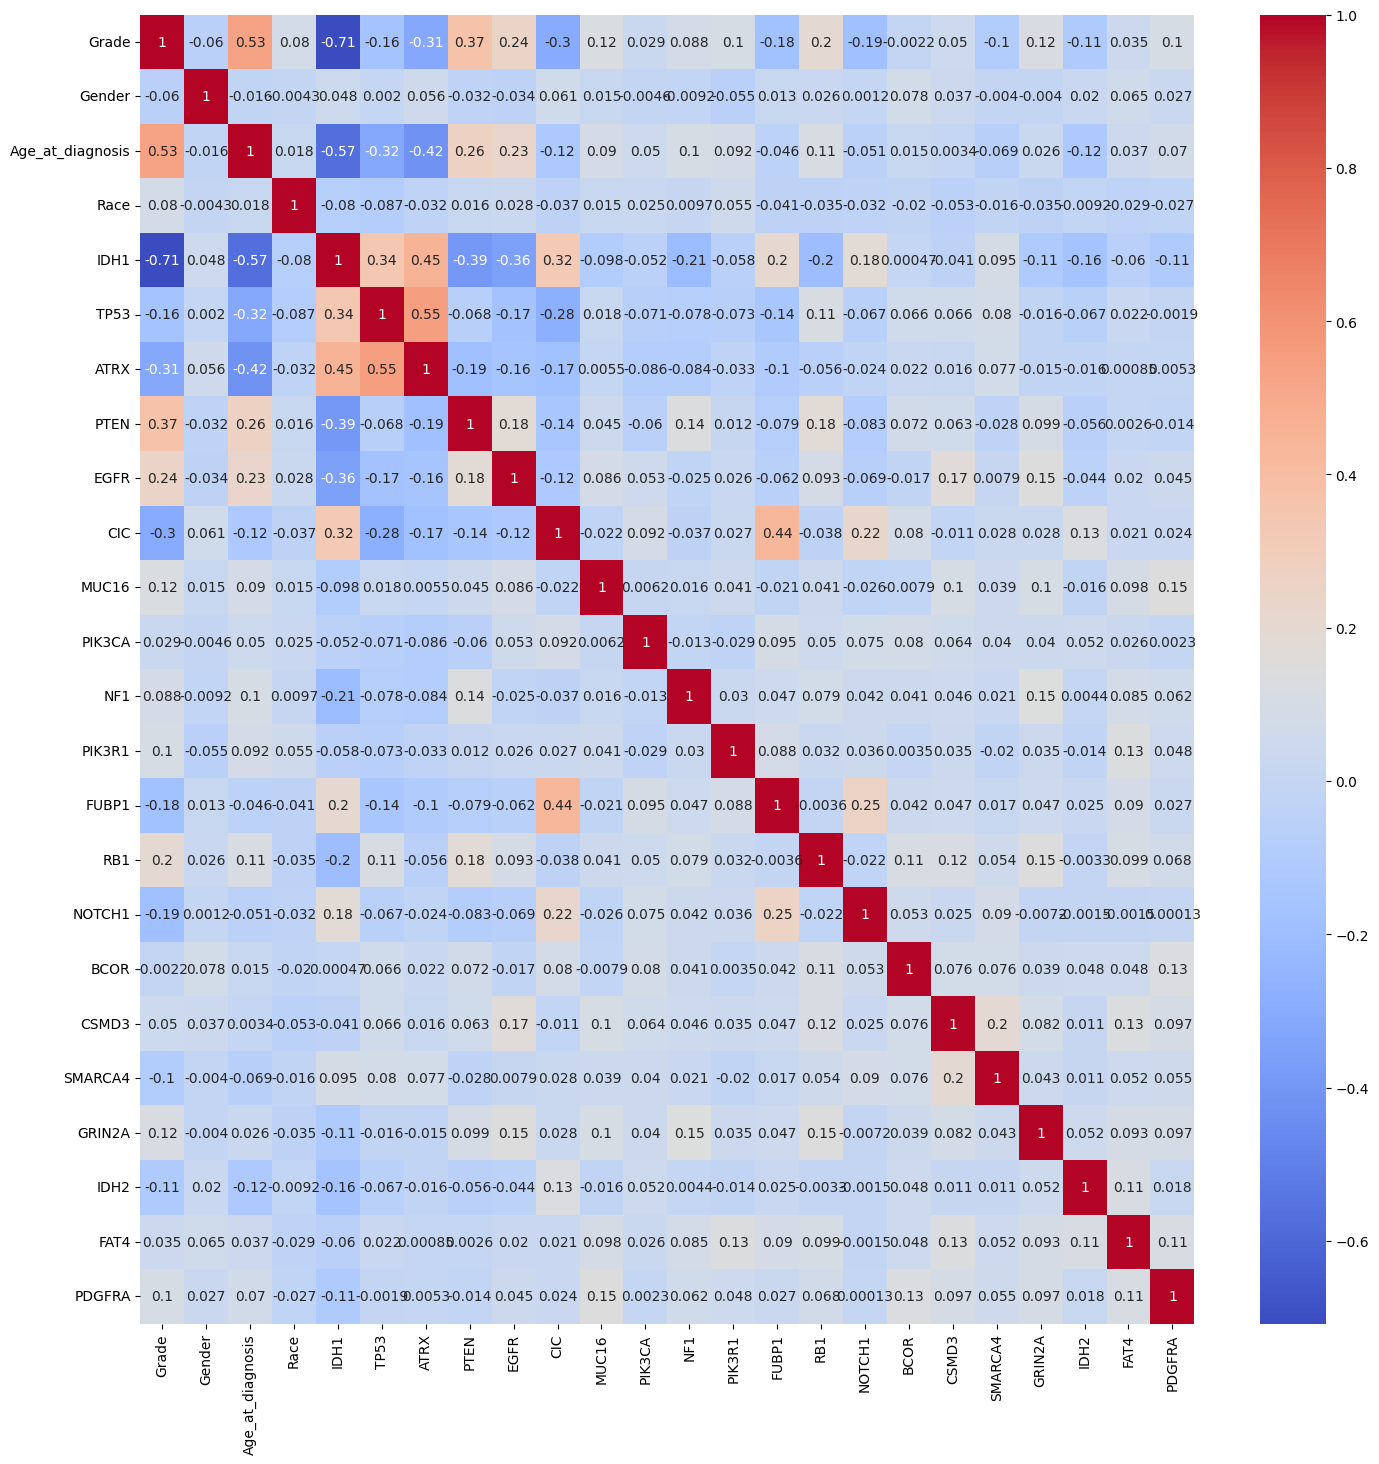

In [19]:
header('Filas y Columnas')
print(f'La base de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas\n')
header('Nombre de las columnas y su tipo de dato')
tipos=pd.DataFrame({'Tipo':df.dtypes})
tipos.reset_index(inplace=True)
tipos.columns=['Nombre de la columna', 'Tipo']
print(tipos)
plt.figure(figsize=(8,8))
color=sns.color_palette('pastel')
df.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color,startangle=90)
plt.title('Distribución de Tipos de Datos', size=16)
plt.ylabel('') #para que no salga etiqueta en el eje y
plt.show()


header(f'Descripción Estadística del dataframe')
print(df.describe(include='all'))
dfnum=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,18))
dfscal=(dfnum-dfnum.mean())/dfnum.std()
sns.boxplot(data=dfscal, orient='h', palette='viridis')
plt.title('Distribución estadistica de variables numéricas')
plt.tight_layout()
plt.show()


header('Corrección de tipos de datos')

verificar=True #pequeño bucle para verificar que todos los datos quedaran en float o int
for i in df.columns:
  if not pd.api.types.is_numeric_dtype(df[i]):
    verificar=False
    break
if verificar:
  print('\nTodas las columnas son int o float ✓\n\n')
else:
  print('No todas las columnas son int o float X')

header('Limpieza, Transformación y Normalización de Datos Categóricos')
verificar=True
for i in df.columns:
  if not pd.api.types.is_categorical_dtype(df[i]):
    verificar=False
    break
if verificar:
  print('Hay columnas con Datos Categóricos')
else:
  print('\nNo hay columnas con Datos Categóricos\n\n')


header('Datos Perdidos')
for col in df.select_dtypes(include=[np.number]).columns:
    # Identificar índices con NaN
    nan_mask = df[col].isna()
    nan_indices = np.where(nan_mask)[0]
    n_nans = len(nan_indices)
    if n_nans > 0:
        #Se obtienen valores unicos existentes (menos NaN)
        valid_values = df.loc[~nan_mask, col]
        unique_values = valid_values.unique()
        # Crea una lista de reemplazos distribuyendo cíclicamente entre los valores únicos
        replacements = []
        for i in range(n_nans):
            value_index = i % len(unique_values)
            replacements.append(unique_values[value_index])
        #Asigna los valores de reemplazo a los índices NaN
        for i, idx in enumerate(nan_indices):
            df.iloc[idx, df.columns.get_loc(col)] = replacements[i]
#cantidad de datos perdidos por columna:
conteo=df.isna().sum()

#porcentaje de datos perdidos por columna:
if conteo.sum()==0:
  print('\n\nNo hay Datos Perdidos\n\n')
else:
  print(f'SE ENCONTRARON: {df.isna().sum()/df.shape[0]*100}% de datos perdidos')
#Dataframe que muestra el porcentaje de los datos perdidos
if conteo.sum()!=0:
  perdidos=pd.DataFrame({'Cantidad':df.isna().sum(), 'Porcentaje':(df.isna().sum()/df.shape[0])*100})
  print(perdidos[perdidos['Cantidad']>0].sort_values('Cantidad', ascending=False))


header('Limpieza, Transformación y Normalización de Datos Temporales:')
#bucle para verificar si tiene datos temporales:
verificar=True
for i in df.columns:
  if not pd.api.types.is_datetime64_dtype(df[i]):
    verificar=False
    break
if verificar:
  print('Hay columnas con Datos Temporales')
else:
  print('\nNo hay columnas con datos temporales\n\n')


header('Outliers')
def analizar_outliers(df):
    # Crear un DataFrame vacío para almacenar los resultados
    resultados = pd.DataFrame(columns=['Columna', 'Límite Inferior', 'Límite Superior',
                                      'Número Outliers', 'Porcentaje (%)'])

    # Iterar sobre cada columna y calcular la información de outliers
    for i, columna in enumerate(df.columns):
        #Calculo de los cuartiles
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limbajo = Q1 - 1.5 * IQR#límites
        limalto = Q3 + 1.5 * IQR

        outliers = df[(df[columna] < limbajo) | (df[columna] > limalto)]#se cuentan los outliers
        num_outliers = len(outliers)
        porcentaje = (num_outliers / len(df)) * 100

        resultados.loc[i] = [columna, round(limbajo, 2), round(limalto, 2),
                           num_outliers, round(porcentaje, 2)]
    return resultados

tabla_outliers = analizar_outliers(df)
display(tabla_outliers)

header('Histogramas de las columnas')
columnas=df.columns.tolist()
gridcol=3
gridfil=math.ceil(len(columnas)/gridcol)
colores = sns.color_palette("husl", len(columnas))
fig = plt.figure(figsize=(5*gridcol, 4*gridfil))
gs = gridspec.GridSpec(gridfil, gridcol, figure=fig, hspace=0.4, wspace=0.4)
for i, col in enumerate(columnas):
    ax = fig.add_subplot(gs[i])
    ax.hist(df[col].dropna(), bins=30, edgecolor='black', color=colores[i])
    ax.set_title(col)
    ax.tick_params(axis='both', labelsize=8)
plt.show()

header('Mapa de calor')
#se grafica un mapa de calor de todas las variables
plt.figure(figsize=(17,17))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


🧠 Reflexiona:

**¿Existen clases desbalanceadas?**

Existen clases desbalanceadas, comenzando por "race" y casi todas las columnas a partir de "atrx", bastantes columnas realmente, lo que es de esperarse por que son datos biométricos.


**¿Qué atributos parecen más informativos?**

Segun el heatmap, para la variable objetivo son más importantes las columnas:
- rb1
- egfr
- pten
- age at diagnosis


# 3. Gráfica de Errores en Entrenamiento y Prueba

En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10

Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades

Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7

Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro

..............··············~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 3. Gráfica de Errores en Entrenamiento y Prueba ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~··············.............. 




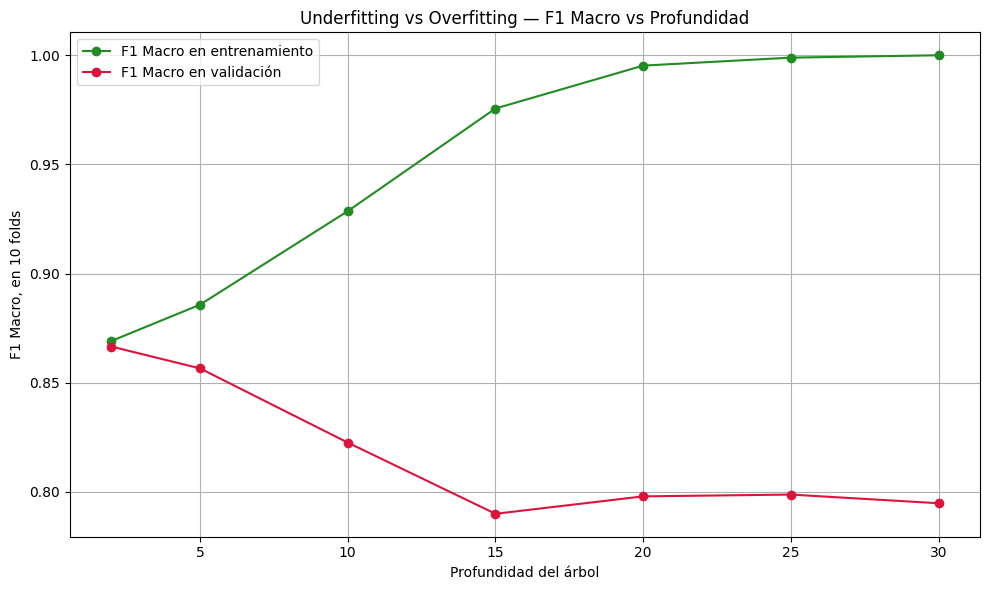

In [20]:
header('3. Gráfica de Errores en Entrenamiento y Prueba')
#se separa la variable objetivo
X = df.drop('Grade', axis=1)
y = df['Grade']

prof = [2, 5, 10, 15, 20, 25, 30, None]

#stratifiedkfold
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=3)

# iterar en los valores de prof
train_f1 = []
test_f1  = []
for d in prof:
    tree = DecisionTreeClassifier(max_depth=d, random_state=7)
    res=cross_validate(tree, X, y, cv=kfold, scoring='f1_macro', return_train_score=True, n_jobs=-1)
    train_f1.append(res['train_score'].mean())
    test_f1.append(res['test_score'].mean())


#Gráfica
plt.figure(figsize=(10,6))
plt.plot(prof, train_f1, marker='o', color='forestgreen', label='F1 Macro en entrenamiento')
plt.plot(prof, test_f1,  marker='o', color='crimson' ,label='F1 Macro en validación')
plt.xlabel('Profundidad del árbol')
plt.ylabel('F1 Macro, en 10 folds')
plt.title('Underfitting vs Overfitting — F1 Macro vs Profundidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Optimización de hiperparámetros con RandomizedSearchCV: F1 Macro

Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
Criterion = gini ,entropy
max_depth: de 5 a 50 con incrementos de 1
min_samples_split: de 2 a 20 con incrementos de 1

Usa el árbol de decisión
StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
n_iter = 5 (combinaciones aleatorias a buscar)
n_jobs = -1 para acelerar cómputo

Métrica de evaluación: f1 Macro

Imprime los mejores hiperparámetros encontrados

Imprime el best_score

In [21]:
start_time = time.perf_counter()
header('4. Optimización de hiperparámetros con RandomizedSearchCV')

tree=DecisionTreeClassifier(random_state=7)
#se define el espacio de busqueda aleatorio
param_grid={'criterion':['gini','entropy'],
            'max_depth':range(5,51,1),
            'min_samples_split':range(2,21,1)}
#K fold estratificado
kfold=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
rand_search=RandomizedSearchCV(estimator=tree, param_distributions=param_grid, n_iter=5, cv=kfold, scoring='f1_macro', n_jobs=-1, random_state=3)
rand_search.fit(X,y)

print(f'Mejores hiperparametros: {rand_search.best_params_}')
print(f'Mejor F1 Macro: {rand_search.best_score_}')
randf1par=rand_search.best_params_
randf1sco=rand_search.best_score_

end_time = time.perf_counter()
tiemporsm = end_time - start_time

.............·············~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 4. Optimización de hiperparámetros con RandomizedSearchCV ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~·············............. 


Mejores hiperparametros: {'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}
Mejor F1 Macro: 0.8597022989677783


# 5. Optimización de hiperparámetros con GridSearchCV: F1 Macro

Define el espacio de búsqueda  para los siguientes hiperpárametros:

Criterion = gini ,entropy
max_depth: de 5 a 50 con incrementos de 1
min_samples_split: de 2 a 20 con incrementos de 1

Usa el árbol de decisión

StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
Métrica de evaluación: f1 Macro
n_jobs = -1 para acelerar cómputo
Imprime los mejores hiperparámetros encontrados

Imprime el best_score

In [22]:
start_time = time.perf_counter()
header('5. Optimización de hiperparámetros con GridSearchCV')

tree=DecisionTreeClassifier(random_state=7)
#se define el espacio de busqueda
param_grid={'criterion':['gini','entropy'],
            'max_depth':range(5,51,1),
            'min_samples_split':range(2,21,1)}
kfold=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
grid_search=GridSearchCV(estimator=tree, cv=kfold, param_grid=param_grid, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X,y)

print(f'Mejor Score: {grid_search.best_score_} \nresultado de los parametros: {grid_search.best_params_}')
gridf1par=grid_search.best_params_
gridf1sco=grid_search.best_score_

end_time = time.perf_counter()
tiempogsm = end_time - start_time

.............·············~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 5. Optimización de hiperparámetros con GridSearchCV ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~·············............. 


Mejor Score: 0.86403243234729 
resultado de los parametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}


# 6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy

Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
Criterion = gini ,entropy
max_depth: de 5 a 50 con incrementos de 1
min_samples_split: de 2 a 20 con incrementos de 1

Usa el árbol de decisión

StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
n_iter = 5 (combinaciones aleatorias a buscar)
n_jobs = -1 para acelerar cómputo

Métrica de evaluación: accuracy

Imprime los mejores hiperparámetros encontrados

Imprime el best_score


In [23]:
start_time = time.perf_counter()
header('6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy')
#modelo de arbol de desicion
tree=DecisionTreeClassifier(random_state=7)
#se define el espacio de busqueda aleatorio
param_grid={'criterion':['gini','entropy'],
            'max_depth':range(5,51,1),
            'min_samples_split':range(2,21,1)}
#K fold estratificado
kfold=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
rand_search=RandomizedSearchCV(estimator=tree, param_distributions=param_grid, n_iter=5, cv=kfold, scoring='accuracy', n_jobs=-1, random_state=3)
rand_search.fit(X,y)

print(f'Mejores hiperparametros: {rand_search.best_params_}')
print(f'Mejor Accuracy: {rand_search.best_score_}')
randaccpar=rand_search.best_params_
randaccsco=rand_search.best_score_

end_time = time.perf_counter()
tiemporsa = end_time - start_time

............············~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy ≋≋≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~············............ 


Mejores hiperparametros: {'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}
Mejor Accuracy: 0.8617613310384394


# 7. Optimización de hiperparámetros con GridSearchCV: accuracy

Define el espacio de búsqueda  para los siguientes hiperpárametros:
Criterion = gini ,entropy
max_depth: de 5 a 50 con incrementos de 1
min_samples_split: de 2 a 20 con incrementos de 1

Usa el árbol de decisión

StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)

Métrica de evaluación: f1 Macro

n_jobs = -1 para acelerar cómputo

Imprime los mejores hiperparámetros encontrados

Imprime el best_score

In [24]:
start_time = time.perf_counter()
header('7. Optimización de hiperparámetros con GridSearchCV: accuracy')
#arbol
tree=DecisionTreeClassifier(random_state=7)
#se define el grid
param_grid={'criterion':['gini','entropy'],
            'max_depth':range(5,51,1),
            'min_samples_split':range(2,21,1)}
kfold=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
grid_search=GridSearchCV(estimator=tree, cv=kfold, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X,y)
print(f'Mejores hiperparametros: {grid_search.best_params_}')
print(f'Mejor Score: {grid_search.best_score_}')

gridaccpar=grid_search.best_params_
gridaccsco=grid_search.best_score_

end_time = time.perf_counter()
tiempogsa = end_time - start_time

............············~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 7. Optimización de hiperparámetros con GridSearchCV: accuracy ≋≋≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~············............ 


Mejores hiperparametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
Mejor Score: 0.8653327596098681




# 8.Actividad de reflexión y análisis


**¿Cuál método encontró mejores hiperparámetros y cuál fue más costoso computacionalmente?**

Los mejores hiperparámetros los encontró GridSearchCV, por que busca todas las combinaciones hasta encontrar la mejor, eso a costa de un costo computacional mucho mayor. Esas celdas duraron mas de 2 minutos en ejecutarse, y con RandomSearch fueron solo unos segundos.

================================================================================

**¿Los resultados en f1_macro y accuracy fueron distintos en ambos métodos de optimización? ¿Por qué?**

Los resultados de f1_macro de GridSearch y RandomizedSearch (en accuracy y f1_score) fueron distintos como era de esperarse, debido a que GridSearch busca la mejor combinación intentándolas todas, entonces los garantiza que los hiperparametros que devuelve sean los mejores. En cambio RandomizedSearch busca las combinaciones iterando solo 5 ocasiones (n_iter=5) y devuelve la mejor que encontró dentro de esas 5. Entre esas iteraciones existe la probabilidad de encontrar la mejor comparandola con gridsearch, aunque es muy poca. Regularmente es mas baja que gridsearch.

================================================================================

**¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?**

Los hiperparámetros, tanto en GridSearch, como en RandomizedSearch son idénticos en Accuracy y f1 Macro. Al cambiar el random_state en alguno de ellos, dejan de coincidir entre si.

In [43]:
header('Resultados')

print(f'RandomizedSearchCV f1 macro parametros: {randf1par}\nRandomizedSearchCV f1 macro score: {randf1sco}\nCon un tiempo de ejecucion de: {tiemporsm:.4f} segundos\n')
print(f'GridSearchCV f1 macro parametros: {gridf1par}\nGridSearchCV f1 macro score: {gridf1sco}\nCon un tiempo de ejecución de {tiempogsm:.4f} Segundos\n')
print(f'RandomizedSearchCV accuracy parametros: {randaccpar}\nRandomizedSearchCV accuracy score: {randaccsco}\nCon un tiempo de ejecución de: {tiemporsa:.4f} segundos\n')
print(f'GridSearchCV accuracy parametros: {gridaccpar}\nGridSearchCV accuracy score: {gridaccsco}\nCon un tiempo de ejecución de: {tiempogsa:.4f} Segundos')

print(f'\nLa diferencia de tiempo entre RandomizedSearch y GridSearch en Accuracy es de: {abs(tiemporsa-tiempogsa):.4f} segundos\nGridSearch se toma {tiempogsa/tiemporsa:.0f} veces de lo que tarda RandomizedSearch.\n')
print(f'La diferencia de tiempo entre RandomizedSearch y GridSearch en F1 Macro es de: {abs(tiemporsm-tiempogsm):.4f} segundos\nGridSearch se toma {tiempogsm/tiemporsm:.0f} veces de lo que tarda RandomizedSearch.\n')

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Resultados ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


RandomizedSearchCV f1 macro parametros: {'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}
RandomizedSearchCV f1 macro score: 0.8597022989677783
Con un tiempo de ejecucion de: 0.4116 segundos

GridSearchCV f1 macro parametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
GridSearchCV f1 macro score: 0.86403243234729
Con un tiempo de ejecución de 148.2145 Segundos

RandomizedSearchCV accuracy parametros: {'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}
RandomizedSearchCV accuracy score: 0.8617613310384394
Con un tiempo de ejecución de: 0.3610 segundos

GridSearchCV accuracy parametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
GridSearchCV accuracy score: 0.8653327596098681
Con un tiempo de ejecución de: 119.1465 Segundos

La diferencia de 